# Prototipo para hacer la base de datos de un negocio dedicado a la farbicacion de materiales para la construccion:
**Tabiques S.A. de C.V.**

Debvemos de comenzar la base de datos con las tablas escenciales que vamos a requerir dentro de nuestra base de datos y estaran definidas de la siguiente manera:
1. Clientes: id_cliente, nombre, telefono, email, direccion
2. Compras: id_compra, fecha, id_proveedor, total
3. DetalleCompra: id_detalle_compra, id_compra, id_material, cantidad, precio_unitario
4. DetalleVenta: id_detalle_venta, id_venta, id_material, cantidad, precio_unitario
5. Materiales: id_material, nombre_material, tipo, unidad_medida, precio_unitario, stock_actual
6. Produccion: id_produccion, fecha, id_material, cantidad_producida, costo_unitario
7. Proveedores: id_proveedor, nombre, contacto, email, telefono
8. Ventas: id_venta, fecha, id_cliente, total

In [1]:
# Para comenzar con el analisis hay que definir las tablas que serán nuestro KPI
# En este caso sera la tabla de 'Produccion' y 'Materiales'
# Otra tabla que tambien nos va a ayudar mas adelante sera 'DetallVenta'

In [2]:
# Antes de subir el archivo hayq ue considerar que se deben de importar la librearias necesarias para el manejo y analisis de datos

# La aprimera libreria que vamos a utilizar sera pandas para el manejo de datos y tablas
import pandas as pd

# Posteriormente se importara numpy parsa calculos numericos
import numpy as np

# Luego vamos a importar myplotlib.pyplot para las graficas
import matplotlib.pyplot as plt

# Despues vamos a importar seaborn para graficas mas estilizadas
import seaborn as sns
from datetime import datetime

In [3]:
# Para una mejor vizuallizacion de los datos vamos a utilizar la siguientew linea de codigo

sns.set(style="whitegrid")

## 1. Lectura basica y union de tablas

In [15]:
df_detalle_venta = pd.read_csv('DetalleVenta.csv')
df_produccion = pd.read_csv('Produccion.csv')
df_materiales = pd.read_csv('Materiales.csv')

In [16]:
df_produccion.head()

,id_produccion,fecha,id_material,cantidad_producida,costo_unitario
0,1,2024-06-01,1,616,0.18
1,2,2024-06-02,1,500,0.19
2,3,2024-06-03,1,576,0.22
3,4,2024-06-04,1,1113,0.19
4,5,2024-06-05,1,594,0.20


In [17]:
df_materiales.head()

,id_material,nombre_material,tipo,unidad_medida,precio_unitario,stock_actual
0,1,Arcilla,Materia Prima,kg,0.050,10000
1,2,Aserr�n,Materia Prima,kg,0.030,30603
2,3,Agua,Materia Prima,litro,0.002,42502
3,4,Arcilla,Materia Prima,kg,0.050,28642
4,5,Aserr�n,Materia Prima,kg,0.030,5000


In [18]:
# Abrimos ambas tablas para tener nombre y tipo de material

df_merged = pd.merge(df_produccion, df_materiales, on='id_material')

## 2. Aseguramos el formato fecha para filtrar mejor los datos

In [8]:
# Convertimos la columna 'fecha' al tipo de 'datetime' para anlisis por dia

df_merged['fecha'] = pd.to_datetime(df_merged['fecha'])

## 3. Calculamos el KPI 1 para la produccion diaria total

In [9]:
# Calculamos el KPI 1 como 'La produccion diaria total'
produccion_diaria = df_merged.groupby(df_merged['fecha'].dt.date)['cantidad_producida'].sum().reset_index()
produccion_diaria.head()

,fecha,cantidad_producida
0,2024-06-01,3591
1,2024-06-02,2721
2,2024-06-03,3028
3,2024-06-04,5179
4,2024-06-05,3173


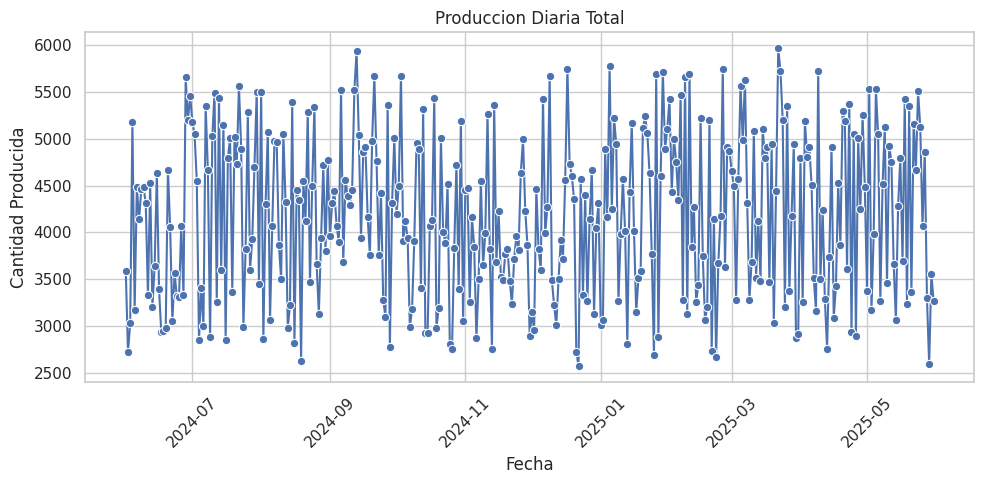

In [10]:
# Ahora vamos a realizar el grafico con el siguiente codigo

plt.figure(figsize=(10, 5))
sns.lineplot(x='fecha', y='cantidad_producida', data=produccion_diaria, marker='o')
plt.title('Produccion Diaria Total')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Producida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Calculamos el KPI 2

In [11]:
# Produccion por tipo de material

produccion_pro_tipo = df_merged.groupby(['fecha', 'tipo'])['cantidad_producida'].sum().reset_index()
produccion_pro_tipo.head()

,fecha,tipo,cantidad_producida
0,2024-06-01,Materia Prima,3591
1,2024-06-02,Materia Prima,2721
2,2024-06-03,Materia Prima,3028
3,2024-06-04,Materia Prima,5179
4,2024-06-05,Materia Prima,3173


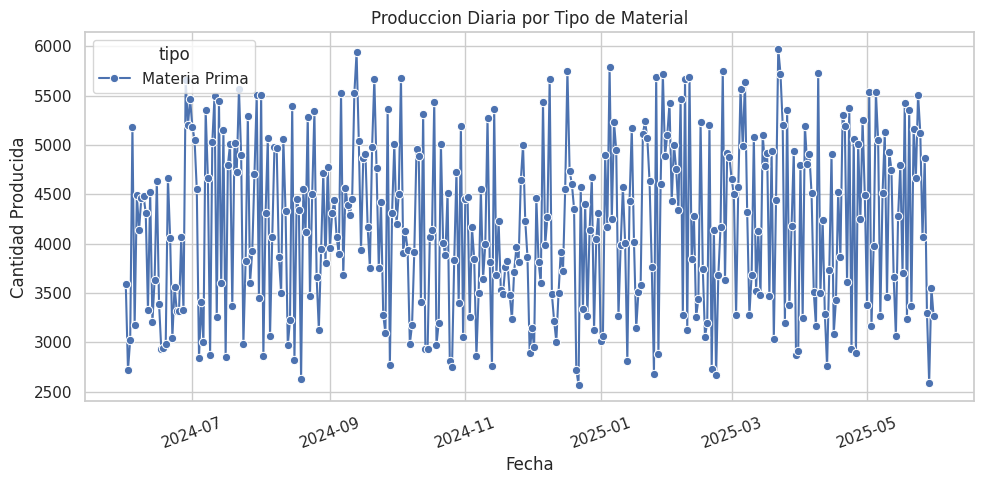

In [12]:
# Al igual que en el caso anterior, realizamos el grafico correspondiente a la produccion por tipo de material.

plt.figure(figsize=(10, 5)) # Con esta funcion martcamos las dimensiones del grafico
sns.lineplot(x='fecha', y='cantidad_producida', hue='tipo', data=produccion_pro_tipo, marker='o') # Determinamos la data en el grafico
plt.title('Produccion Diaria por Tipo de Material') # Al usar 'plt.title' asignamos el nombre al grafico
plt.xlabel('Fecha') # Mediante el uso de 'plt.xlabel' marcamos el nombre del eje 'x'
plt.ylabel('Cantidad Producida') # Marcamos el nombre del eje 'y'
plt.xticks(rotation=20) # Marcamos el aangulo de inclinacion en el eje 'x'
plt.tight_layout() # Muestra el mapa completo?
plt.show() # Muestra el resultado de toda la linea de codigo

## 5. Definimos el KPI 3 - dias sin produccion o posibles paros de produccion

In [13]:
meta_diaria = 500  # cambia según el material o lo que consideres

produccion_diaria['meta'] = meta_diaria
produccion_diaria['cumplimiento_%'] = (produccion_diaria['cantidad_producida'] / meta_diaria) * 100

print(produccion_diaria)

          fecha  cantidad_producida  meta  cumplimiento_%
0    2024-06-01                3591   500           718.2
1    2024-06-02                2721   500           544.2
2    2024-06-03                3028   500           605.6
3    2024-06-04                5179   500          1035.8
4    2024-06-05                3173   500           634.6
..          ...                 ...   ...             ...
360  2025-05-27                4864   500           972.8
361  2025-05-28                3302   500           660.4
362  2025-05-29                2589   500           517.8
363  2025-05-30                3555   500           711.0
364  2025-05-31                3264   500           652.8

[365 rows x 4 columns]


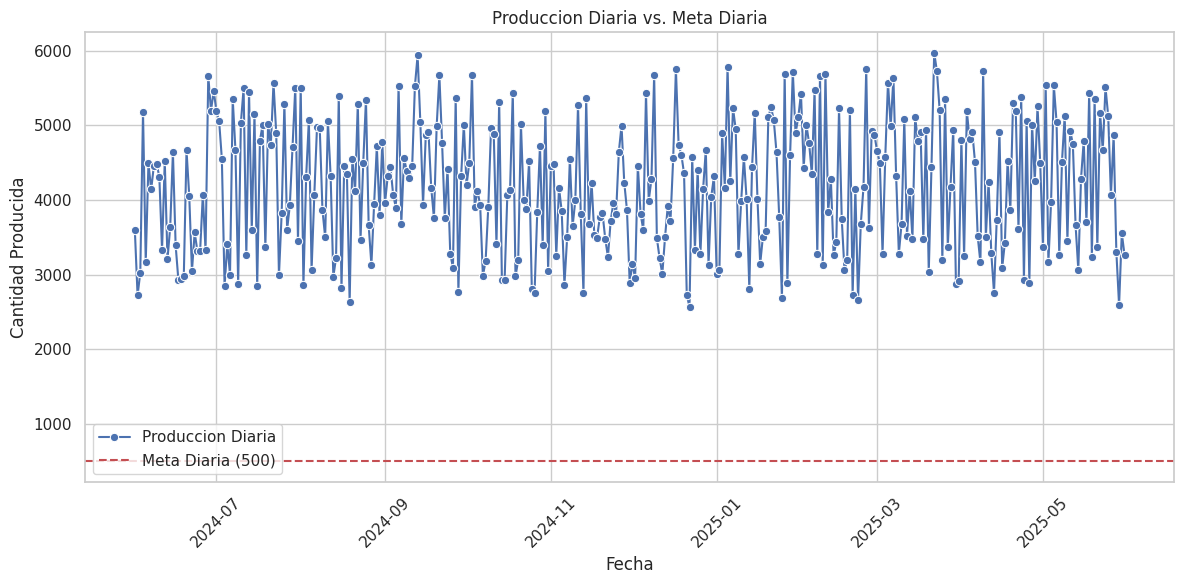

In [14]:
# Para representar esta tabla de una mejor manera usaremos matplotlib y seaborn

plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='cantidad_producida', data=produccion_diaria, label='Produccion Diaria', marker='o')
plt.axhline(y=meta_diaria, color='r', linestyle='--', label=f'Meta Diaria ({meta_diaria})')
plt.title('Produccion Diaria vs. Meta Diaria')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Producida')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 6. Ahora vamos a mostrar las grafica y adjuntar un semaforo

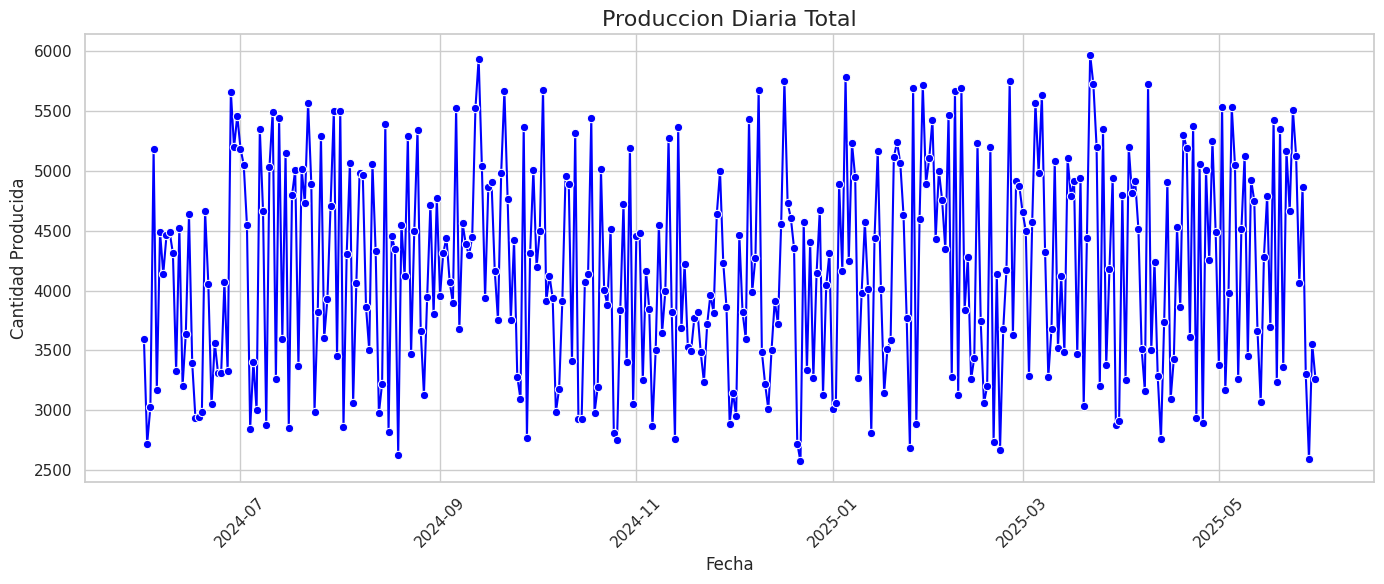

In [20]:
# 1er grafico para la produccion diaria

plt.figure(figsize=(14, 6))
sns.lineplot(data=produccion_diaria, x='fecha', y='cantidad_producida', marker='o', color='blue')
plt.title('Produccion Diaria Total', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Producida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

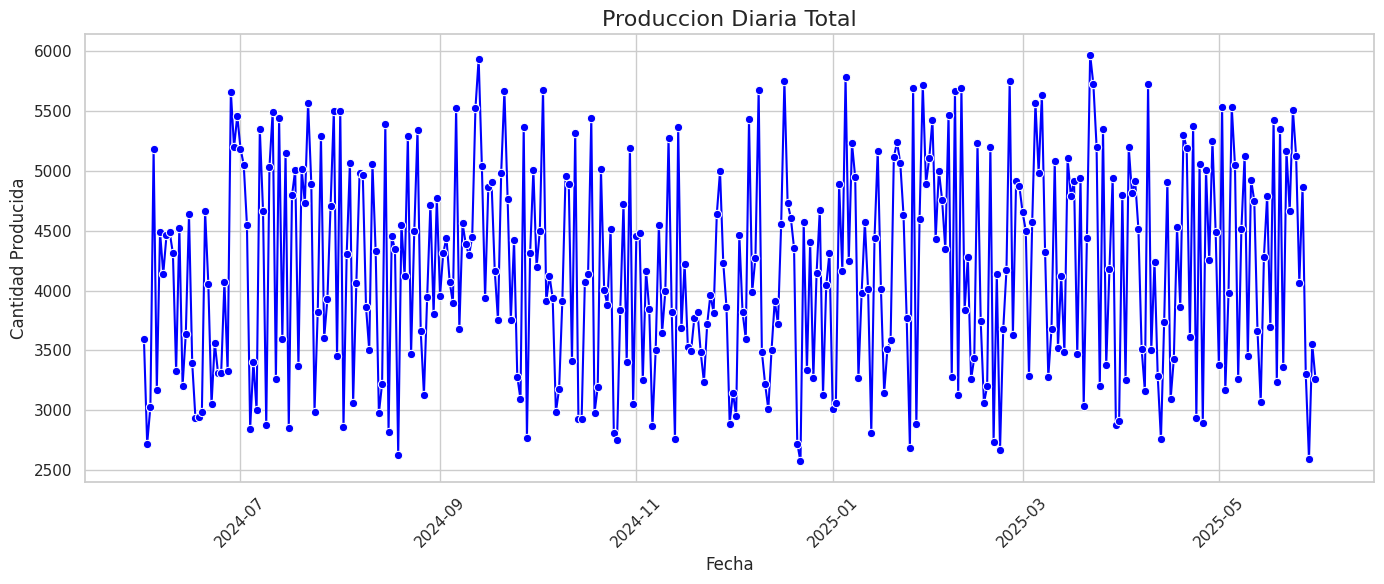

In [21]:
# Ahora para clasificar el cumplimiento por color se utilizara

def color_semaforo(valor):
  if valor <=80:
    return 'red'
  elif valor <=100:
    return 'orange'
  else:
    return 'green'

colores = produccion_diaria['cumplimiento_%'].apply(color_semaforo)

plt.figure(figsize=(14, 6))
sns.lineplot(data=produccion_diaria, x='fecha', y='cantidad_producida', marker='o', color='blue')
plt.title('Produccion Diaria Total', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Producida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

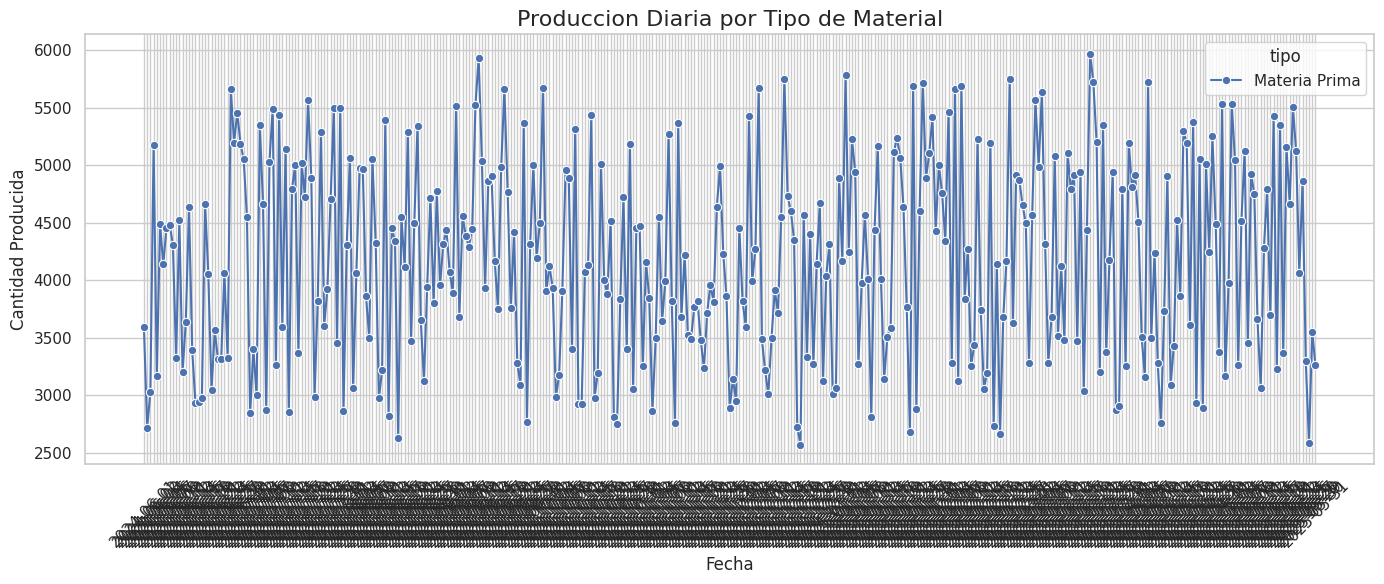

In [22]:
from itertools import product
# Ahora vamos a hacer la produccion por tipo de material

produccion_pro_tipo = df_merged.groupby(['fecha', 'tipo'])['cantidad_producida'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=produccion_pro_tipo, x='fecha', y='cantidad_producida', hue='tipo', marker='o')
plt.title('Produccion Diaria por Tipo de Material', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Producida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Por ultimo vamos a hacer la tabla reusmen
produccion_diaria

,fecha,cantidad_producida,meta,cumplimiento_%
0,2024-06-01,3591,500,718.2
1,2024-06-02,2721,500,544.2
2,2024-06-03,3028,500,605.6
3,2024-06-04,5179,500,1035.8
4,2024-06-05,3173,500,634.6
...,...,...,...,...
360,2025-05-27,4864,500,972.8
361,2025-05-28,3302,500,660.4
362,2025-05-29,2589,500,517.8
363,2025-05-30,3555,500,711.0


Durante los últimos 30 días, todos los días superaron la meta en más del 500%, lo cual indica una buena capacidad productiva.
Pero también sugiere que la meta puede estar desactualizada.


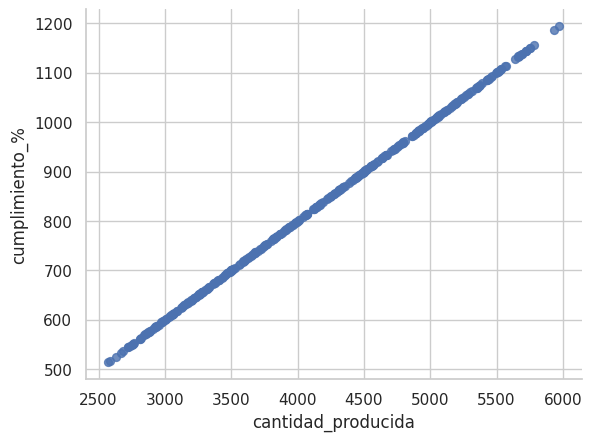

In [32]:
from matplotlib import pyplot as plt
produccion_diaria.plot(kind='scatter', x='cantidad_producida', y='cumplimiento_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

print('Durante los últimos 30 días, todos los días superaron la meta en más del 500%, lo cual indica una buena capacidad productiva.')
print('Pero también sugiere que la meta puede estar desactualizada.')